# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

*Users on TikTok can report videos that may be in violation of the platform's terms of service. However, due to the volume of the content, many videos get reported, and there are too many for a human moderator to examine and consider in a timely fashion. A previous analysis of videos that were in violation showed that those in violation are more likely to be videos in which authors are making claims as opposed to sharing opinions. This makes it important to classify which videos are claims and which are opinions.* 

*The business objective is to build a machine learning model to help identify claims vs opinions. Providing these labels will streamline the human content review process, by presenting human moderators with videos that are most likely to be in violation of TikTok's terms of service. 
The model should be evaluated based on the false positive and false negative rate.*

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?
  
*Ethically, it would be better for the model to predict more false positive cases (claims) because the company should catch as many violations of the terms of service as possible, and ban these authors to maintain the platform. Otherwise, authors get away with bad video content violations in spite of getting reported. In the same vein, it is more important to minimize false negatives. As a result, we want to optimize for recall.*

3.   **How would you proceed?**

*To proceed, since there are about 20,000 rows in the dataset, representing videos in need of review, rigorous validation is possible. This is what my workflow will look like:*
    1. Split the data into train, *validation* and test splits
    2. Fit model to training set and apply hyperparameter tuning
    3. Select the final model based on the validation set
    4. Asses the champion model performance on the test set


## **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [3]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, recall_score, f1_score, accuracy_score, precision_score,\
confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

## **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [5]:
# Display first few rows
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [6]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [7]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [8]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [9]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [10]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# Drop rows with missing values
data = data.dropna(axis=0)
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [12]:

# Display first few rows after handling missing values
data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0


Check for and handle duplicates.

In [13]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

tree based model, so we are okay to skip this for now

Check class balance.

In [14]:
# Check class balance
data['claim_status'].value_counts(normalize=True)*100

claim_status
claim      50.345839
opinion    49.654161
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

## **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [15]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [16]:
# Calculate the average text_length for claims and opinions
data.groupby('claim_status')[['text_length']].mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

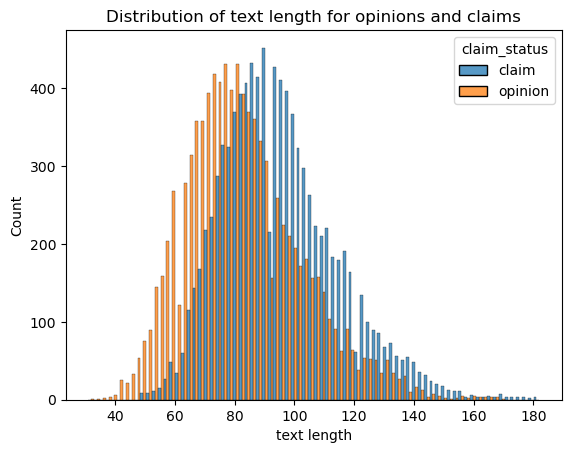

In [17]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
plt.title('Distribution of text length for opinions and claims')
plt.xlabel('text length')
sns.histplot(data=data, x='text_length', hue='claim_status', legend=True, multiple='dodge')
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [19]:
# Create a copy of the X data
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id'], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim':1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first = True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


## **Task 4: Split the data**

Assign target variable.

In [20]:
# Isolate target variable
y = X['claim_status']

Isolate the features.

In [21]:
# Isolate features
X= X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


## **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [22]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [23]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [24]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_tr.shape, X_test.shape, y_tr.shape, y_test.shape


((11450, 11),
 (3817, 11),
 (11450,),
 (3817,),
 (15267, 11),
 (3817, 11),
 (15267,),
 (3817,))

## Tokenize text column

In [25]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [26]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,55,254459.0,66996.0,2673.0,220.0,95.0,97,False,False,True,...,0,0,0,1,0,0,0,0,0,0
1,40,433056.0,85389.0,13301.0,1766.0,1.0,110,False,False,True,...,0,0,0,0,0,0,0,1,0,0
2,29,997358.0,83574.0,17310.0,951.0,530.0,155,False,True,False,...,0,1,1,0,0,0,0,0,0,0
3,15,122973.0,53791.0,14407.0,257.0,8.0,89,False,True,False,...,0,0,0,0,0,0,0,0,0,0
4,17,948.0,309.0,61.0,8.0,2.0,77,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,34,761969.0,502599.0,94675.0,3242.0,1763.0,98,False,False,False,...,0,0,0,0,1,0,0,0,1,0
1,54,4168.0,965.0,106.0,9.0,2.0,95,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,43,8347.0,1684.0,134.0,39.0,7.0,84,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,6,6902.0,2861.0,20.0,27.0,1.0,74,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,20,37.0,8.0,1.0,0.0,0.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,22,6517.0,337.0,120.0,5.0,0.0,73,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,39,758131.0,41367.0,11288.0,774.0,143.0,83,False,False,False,...,0,0,0,0,0,0,0,0,1,0
2,17,613559.0,368043.0,113662.0,7130.0,4288.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,9,363966.0,196481.0,1246.0,1593.0,657.0,114,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,582955.0,86748.0,7182.0,865.0,21.0,98,False,False,True,...,0,0,0,0,0,0,0,0,0,0


## **Task 6. Build models**


# **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [33]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None], 
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3], 
             'n_estimators': [75, 100, 200]    
}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [34]:
%%time

rf_cv.fit(X_train_final, y_train)

CPU times: user 5min 54s, sys: 709 ms, total: 5min 55s
Wall time: 5min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'f1', 'accuracy', 'precision', 'recall'})

In [35]:
# Examine best recall score
rf_cv.best_score_

0.9955157537710868

In [38]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

,Model,Recall,Precision,F1,Accuracy
0,Tuned Random Forest,<function recall_score at 0x7f3c6fa02ca0>,<function precision_score at 0x7f3c6fa02c00>,<function f1_score at 0x7f3c6fa027a0>,<function accuracy_score at 0x7f3c6fa023e0>


**Question:** How well is your model performing? Consider average recall score and precision score.

# **Build an XGBoost model**

In [44]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[4, 8, 12], 
            'min_child_weight':[3, 5],
            'learning_rate':[0.01, 0.1], 
            'n_estimators':[300, 500]}

# Define a dictionary of scoring metrics to capture
scoring={'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [45]:
%%time

xgb_cv.fit(X_train_final, y_train)

CPU times: user 9min 37s, sys: 2.14 s, total: 9min 39s
Wall time: 4min 56s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'f1', 'accuracy', 'precision', 'recall'})

In [46]:
xgb_cv.best_score_

0.9915490464431287

In [47]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

**Question:** How well does your model perform? Consider recall score and precision score.

Exceptionally well considering precision

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

## **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [49]:
# Use the random forest "best estimator" model to get predictions on the **validation set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the encoded testing set.

In [50]:
# Display the predictions on the **validation set
y_pred

array([1, 0, 0, ..., 0, 0, 1])

Display the true labels of the testing set.

In [51]:
# Display the true labels of the **validation set
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

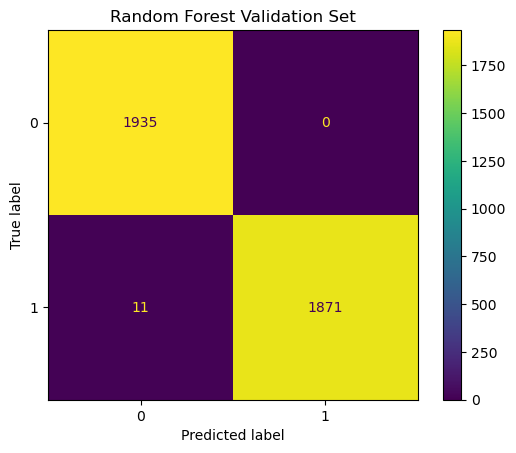

In [63]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix =log_cm, display_labels=None )

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random Forest Validation Set')
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.



In [57]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names= target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

**Note**

The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.

The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.

The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

As the above confusion matrix shows, this model does not produce any false negatives.


*The Random Forest model is incredibly good.*

#### **XGBoost**

In [58]:
#Evaluate XGBoost model
y_pred2 = xgb_cv.best_estimator_.predict(X_val_final)

In [59]:
y_pred2

array([1, 0, 0, ..., 0, 0, 1])

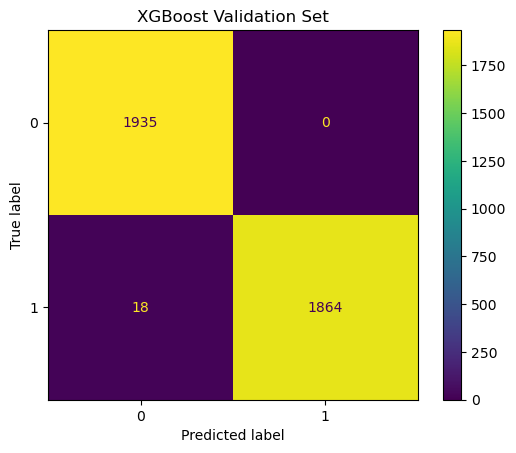

In [62]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred2)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title('XGBoost Validation Set')
plt.show()

In [65]:
# Create a classification report
target_labels = ['opinion','claim']
print(classification_report(y_val, y_pred2, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

They are both very good but the XGBoost model has more false negatives and we want to minimize that, whereas the Random Forest model has a higher recall. For that reason, we champion the RF model.

## **Use champion model to predict on test data**

In [66]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

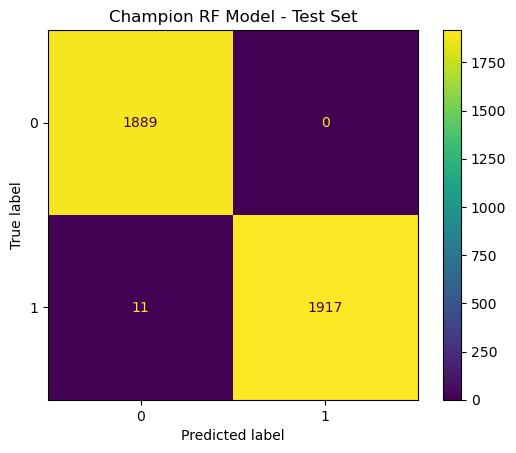

In [68]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title('Champion RF Model - Test Set')
plt.show()

## **Feature importances of champion model**


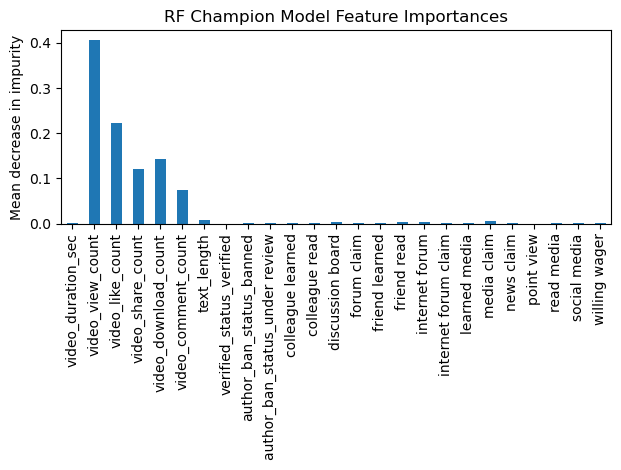

In [73]:
important_features = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(important_features, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('RF Champion Model Feature Importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()


**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features relate to engagement. We saw this during the EDA process. The impact and harm of a violation is related to the reach.

# **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

*Using this model would be a great recommendation because the performance evaluation indicated consistently robust results, in the validation and testing data sets. F1 scores and precision were high and the model was successful in the classification task it was made for.*

2. **What was your model doing? Can you explain how it was making predictions?**

*The most predictive features were related to engagement with the video in question; views, likes, shares, and downloads were the most important variables taken into account in building a strong predictive model.*

3. **Are there new features that you can engineer that might improve model performance?**

*Engineering new features would not be necessary because of how good the model is already performing.*

4. **What features would you want to have that would likely improve the performance of your model?**

*Additional help information might include number of reports or violations by a particular author.*



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.